In [2]:
-- Here is a great way to parse a datetime feature and create some logic to define three conditions:
-- if 7AM to 11PM Monday to Friday, give me 5x16 (working days and awake hours)
-- if 7AM to 11PM Saturday to Sunday, give me 2x16 (weekends and awake hours)
-- if 11PM to 7AM ANY DAY, give me 7x8 (every day andsleeping hours)


IF OBJECT_ID('MyTable') IS NOT NULL  
   DROP TABLE MyTable;  
GO


CREATE TABLE MyTable (
    ID INT PRIMARY KEY,
    EventDateTime DATETIME,
    EventValue INT
);

-----------------------------------------------------------------------------------------------

DECLARE @StartDate DATETIME = '2022-01-01';
DECLARE @EndDate DATETIME = '2023-12-31';
DECLARE @IDCounter INT = 1;

WHILE @StartDate <= @EndDate
BEGIN
    INSERT INTO MyTable (ID, EventDateTime, EventValue)
    VALUES
        (@IDCounter, @StartDate, CAST((RAND() * 10) + 0.5 AS DECIMAL(5,2)));

    SET @IDCounter = @IDCounter + 1;
    SET @StartDate = DATEADD(HOUR, 1, @StartDate); -- Assuming hourly data
END

-----------------------------------------------------------------------------------------------

SELECT
    ID,
    EventDateTime,
    EventValue,
    CASE
        WHEN (DATEPART(dw, EventDateTime) BETWEEN 2 AND 6 AND DATEPART(HOUR, EventDateTime) BETWEEN 7 AND 22) THEN '5x16'
        WHEN (DATEPART(dw, EventDateTime) IN (1, 7) AND DATEPART(HOUR, EventDateTime) BETWEEN 7 AND 22) THEN '2x16'
        WHEN (DATEPART(HOUR, EventDateTime) >= 23 or (DATEPART(HOUR, EventDateTime) <=6)) THEN '7x8'
        ELSE '' -- Handle null case
    END AS TimeCategory
FROM MyTable


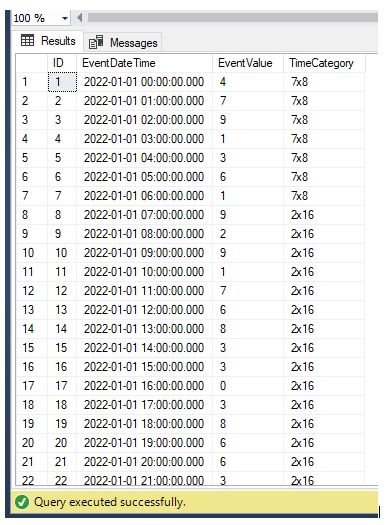

In [3]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "1.JPG")


In [1]:

-- Here is a way to apply the same logic, but create new columns/features, instead of putting everything in the same column.

SELECT
    ID,
    EventDateTime,
    EventValue,
    AVG(CASE WHEN (DATEPART(dw, EventDateTime) BETWEEN 2 AND 6 AND DATEPART(HOUR, EventDateTime) BETWEEN 7 AND 22) THEN EventValue ELSE 0 END) AS [5x16],
    AVG(CASE WHEN (DATEPART(dw, EventDateTime) IN (1, 7) AND DATEPART(HOUR, EventDateTime) BETWEEN 7 AND 22) THEN EventValue ELSE 0 END) AS [2x16],
    AVG(CASE WHEN (DATEPART(HOUR, EventDateTime) >= 23 or (DATEPART(HOUR, EventDateTime) <=6)) THEN  EventValue ELSE 0 END) AS [7x8]
FROM MyTable
GROUP BY     ID,
    EventDateTime,
    EventValue


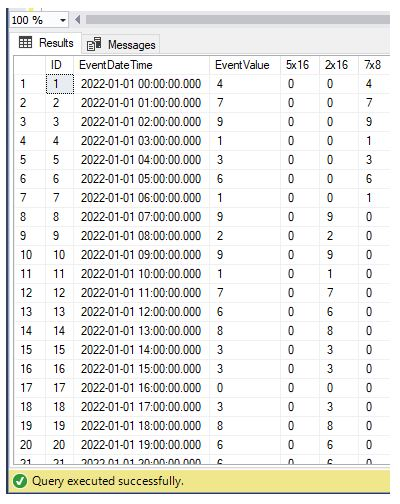

In [4]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "2.JPG")
